NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in


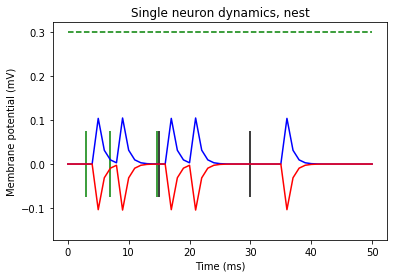

0.10476146635721974 mV


In [30]:
import pyNN.nest as sim
import numpy as np

dt = 1.0
duration = 50

sim.setup(timestep=dt, min_delay=dt)

delay_1 = 1.0
delay_2 = 5.0

v_th = 0.3

q = 10.0
tau_syn = 0.01/q

e_rev = 10000
cm = e_rev/345

cellparams_cond = {'v_thresh': v_th, 'v_reset': -0.2, 'v_rest': 0.0, 'e_rev_E': e_rev, 'e_rev_I': -e_rev, 'i_offset': 0.0,
              'cm': cm/q, 'tau_m': 0.8325, 'tau_syn_E': tau_syn, 'tau_syn_I': tau_syn, 'tau_refrac': 0.0}

# [[exc_spikes],[inh_spikes]]
t1 = [[3, 7, 14.7], [15, 30]]

input_celltype = sim.SpikeSourceArray(spike_times=t1)

pop0 = sim.Population(2,input_celltype)

type = 'cond'

w = 0.1

pop1 = sim.Population(1, sim.IF_cond_exp(**cellparams_cond))
pop2 = sim.Population(1, sim.IF_cond_exp(**cellparams_cond))

w1 = [[0, 0, w, delay_1], [1, 0, w, delay_2]]
w2 = [[0, 0, w, delay_1], [1, 0, w, delay_2]]

pop1.initialize(v=0)
pop2.initialize(v=0)

pop1.record(['spikes','v'])
pop2.record(['spikes','v'])
pop0.record(['spikes'])

# create synapsis
conn1 = sim.FromListConnector(w1)
conn2 = sim.FromListConnector(w2)

sim.Projection(pop0, pop1, connector=conn1, receptor_type='excitatory')
sim.Projection(pop0, pop2, connector=conn2, receptor_type='inhibitory')
#sim.Projection(pop1, pop1, connector=conn3)

sim.run(duration)

sp0 = pop0.get_data().segments[-1].spiketrains
mem1 = pop1.get_data().segments[-1].analogsignals[0]
mem2 = pop2.get_data().segments[-1].analogsignals[0]
sp1 = pop1.get_data().segments[-1].spiketrains
sp2 = pop2.get_data().segments[-1].spiketrains

from matplotlib import pyplot as plt

plt.close('all')
fig=plt.figure('potentials')
plt.plot(mem1, color = 'b', label='sn_cond_inh')
plt.plot(mem2, color = 'r', label='sn_cond_exc')
plt.eventplot(t1[0], lineoffsets=0, linelengths=0.15, colors='g', label='pre_spikes')
plt.eventplot(t1[1], lineoffsets=0, linelengths=0.15, colors='k', label='pre_spikes')
plt.eventplot(sp1, lineoffsets=1, linelengths=0.25, colors='b', label='post_spikes')
#plt.eventplot(sp2, lineoffsets=-4, linelengths=0.25, colors='r', label='post_spikes')
plt.hlines(v_th, 0, duration/dt, 'g', 'dashed')
#plt.legend()
plt.title('Single neuron dynamics, nest')
plt.ylabel('Membrane potential (mV)')
plt.xlabel('Time (ms)')   
#plt.savefig('neuron_comparison.png', dpi=300)
plt.show()

print(np.max(mem1))
